# Images classification with AutoML for Images (Azure ML)

This code outlines the setup for an image classification project including environment preparation, dataset download and extraction, and directory organization for training and testing metal defect images.

<img src="img/automl.png">

## Downloading images

### 📌 Project Overview
The notebook is preparing an environment for training and testing a metal defect image classification model.

### 🧰 Libraries and Setup
Imports include: datetime, matplotlib, os, pandas, seaborn, sys, pathlib, PIL.
Python version used: 3.10.11.

### 📁 Directory Structure
Creates directories:
- images/metaldefect for storing image datasets.
- results for storing output results.

### 🌐 Dataset Download
Downloads three ZIP files from GitHub:
- train1.zip and train2.zip for training images.
- test.zip for test images.

Uses wget to fetch files and confirms successful downloads.

### 📦 Dataset Extraction
Unzips all three datasets quietly:
- Training datasets (train1.zip, train2.zip)
- Test dataset (test.zip)


In [1]:
import datetime
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import sys

from IPython.display import FileLink
from pathlib import Path
from PIL import Image

In [2]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 14-Oct-2025 13:46:29


In [3]:
print(f"Python version = {sys.version}")

Python version = 3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]


## 1. Downloading Images

In [4]:
MAIN_DIR = 'images'

os.makedirs(MAIN_DIR, exist_ok=True)

In [5]:
RESULTS_DIR = 'results'

os.makedirs(RESULTS_DIR, exist_ok=True)

In [6]:
IMAGES_DIR = os.path.join(MAIN_DIR, "metaldefect")

os.makedirs(IMAGES_DIR, exist_ok=True)

In [7]:
HOME_DIR = os.getcwd()

In [8]:
train_images1_zip = "https://raw.githubusercontent.com/retkowsky/image-classification-azure-custom-vision/refs/heads/main/zip/train1.zip"
train_images2_zip = "https://raw.githubusercontent.com/retkowsky/image-classification-azure-custom-vision/refs/heads/main/zip/train2.zip"
test_images_zip = "https://raw.githubusercontent.com/retkowsky/image-classification-azure-custom-vision/refs/heads/main/zip/test.zip"

In [9]:
os.chdir(IMAGES_DIR)

print("Downloading the files...\n")
print("1. Downloading training datasets...")
!wget $train_images1_zip
!wget $train_images2_zip
print("2. Downloading test dataset...")
!wget $test_images_zip

print("✅ Done")


1. Downloading training datasets...
--2025-10-14 13:46:30--  https://raw.githubusercontent.com/retkowsky/image-classification-azure-custom-vision/refs/heads/main/zip/train1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14989494 (14M) [application/zip]
Saving to: ‘train1.zip’

train1.zip          100%[===================>]  14.29M  --.-KB/s    in 0.1s    

2025-10-14 13:46:30 (131 MB/s) - ‘train1.zip’ saved [14989494/14989494]

--2025-10-14 13:46:30--  https://raw.githubusercontent.com/retkowsky/image-classification-azure-custom-vision/refs/heads/main/zip/train2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

In [10]:
# Unzipping the files in a quiet mode
print("Unzipping the files...\n")

print("Unzipping training images dataset. Please wait.")
!unzip -q "train1.zip"
!unzip -q "train2.zip"
print("✅ Done\n")

print("Unzipping test images dataset. Please wait.")
!unzip -q "test.zip"
print("✅ Done")

Unzipping the files...

Unzipping training images dataset. Please wait.
✅ Done

Unzipping test images dataset. Please wait.
✅ Done


In [11]:
print("Removing all the zip files...\n")
os.remove("train1.zip")
os.remove("train2.zip")
os.remove("test.zip")
print("✅ Done")

Removing all the zip files...

✅ Done


In [12]:
os.chdir(HOME_DIR)

### Our images

In [13]:
print("Images directory:", IMAGES_DIR)

Images directory: images/metaldefect


In [14]:
TRAIN_DIR = os.path.join(IMAGES_DIR, "train")
TEST_DIR = os.path.join(IMAGES_DIR, "test")

In [15]:
image_extensions = {".jpg", ".jpeg", ".png", ".gif", ".bmp"}
total_image_count = 0

for directory_path, _, file_list in os.walk(TRAIN_DIR):
    image_count = sum(
        1 for filename in file_list
        if os.path.splitext(filename)[1].lower() in image_extensions
    )
    if image_count > 0:
        print(f"{directory_path:40} = {image_count} images")
    total_image_count += image_count

print(f"\n>> 🖼️ Total number of training image files = {total_image_count}")

images/metaldefect/train/Crazing         = 200 images
images/metaldefect/train/Inclusion       = 200 images
images/metaldefect/train/Patches         = 200 images
images/metaldefect/train/Pitted          = 200 images
images/metaldefect/train/Rolled          = 200 images
images/metaldefect/train/Scratches       = 200 images

>> 🖼️ Total number of training image files = 1200


In [16]:
total_image_count = 0

for directory_path, _, file_list in os.walk(TEST_DIR):
    image_count = sum(
        1 for filename in file_list
        if os.path.splitext(filename)[1].lower() in image_extensions
    )
    if image_count > 0:
        print(f"{directory_path:40} = {image_count} images")
    total_image_count += image_count

print(f"\n>> 🖼️ Total number of test image files = {total_image_count}")

images/metaldefect/test/Crazing          = 30 images
images/metaldefect/test/Inclusion        = 30 images
images/metaldefect/test/Patches          = 30 images
images/metaldefect/test/Pitted           = 30 images
images/metaldefect/test/Rolled           = 30 images
images/metaldefect/test/Scratches        = 30 images

>> 🖼️ Total number of test image files = 180


## 2. Images visualisation

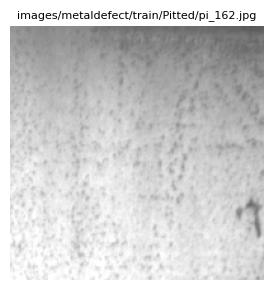

In [17]:
image_extensions = (".jpg", ".jpeg", ".png", ".tif", ".tiff", ".bmp")

image_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(TRAIN_DIR) for f in filenames if f.lower().endswith(image_extensions)]

random_image_path = random.choice(image_paths)
img = Image.open(random_image_path)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.title(random_image_path, fontsize=8)
plt.tight_layout()

plt.show()

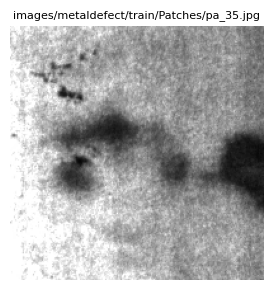

In [18]:
random_image_path = random.choice(image_paths)
img = Image.open(random_image_path)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.title(random_image_path, fontsize=8)
plt.tight_layout()

plt.show()

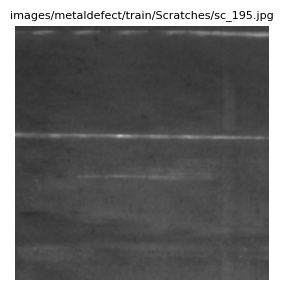

In [19]:
random_image_path = random.choice(image_paths)
img = Image.open(random_image_path)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.title(random_image_path, fontsize=8)
plt.tight_layout()

plt.show()


images/metaldefect/train/Crazing - showing first 5 image(s)


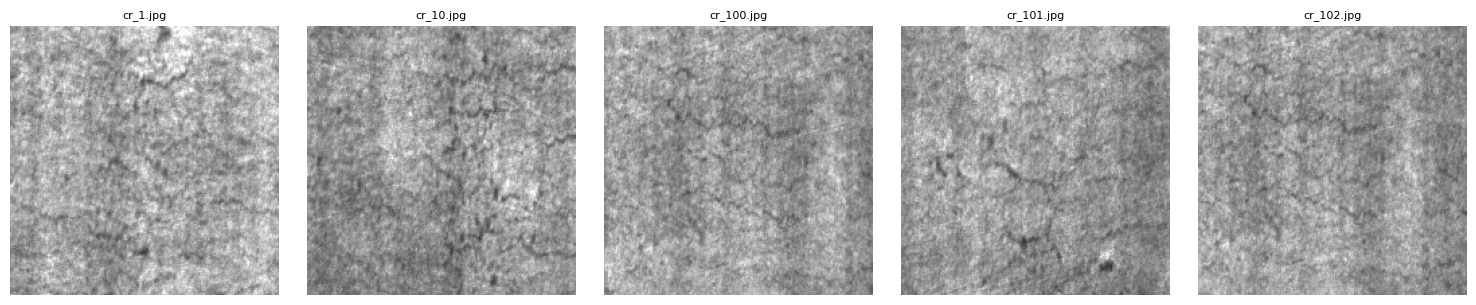


images/metaldefect/train/Inclusion - showing first 5 image(s)


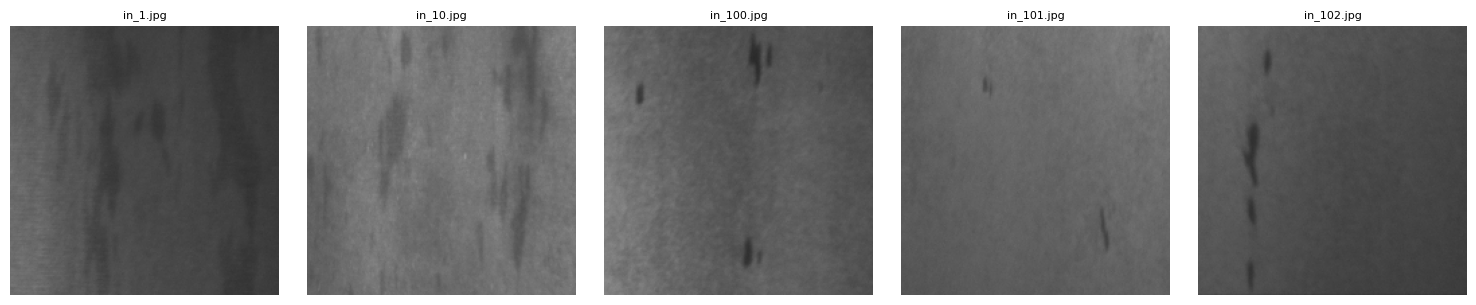


images/metaldefect/train/Patches - showing first 5 image(s)


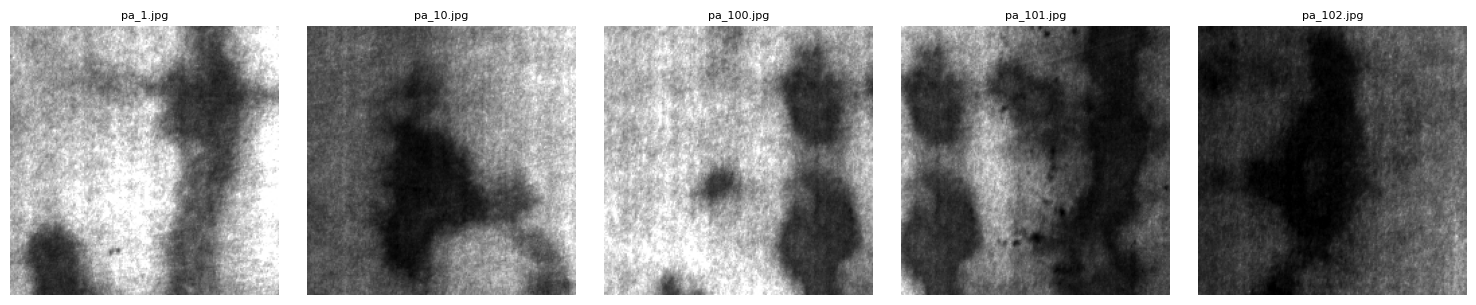


images/metaldefect/train/Pitted - showing first 5 image(s)


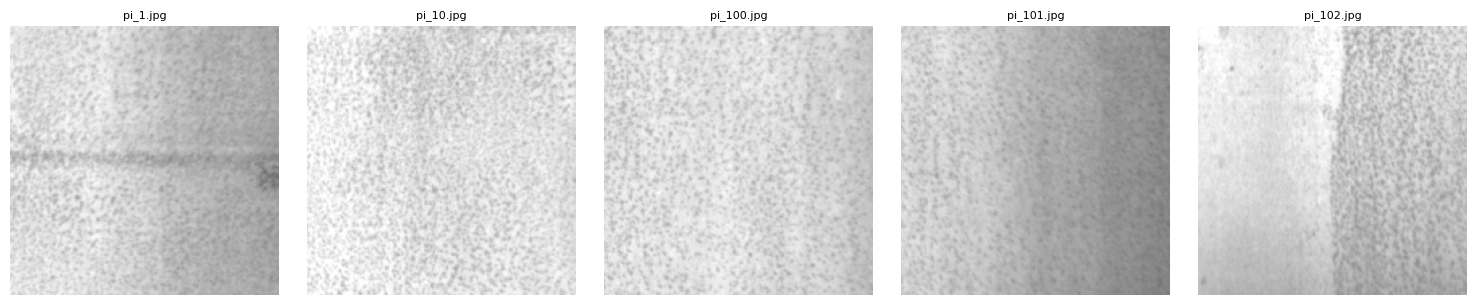


images/metaldefect/train/Rolled - showing first 5 image(s)


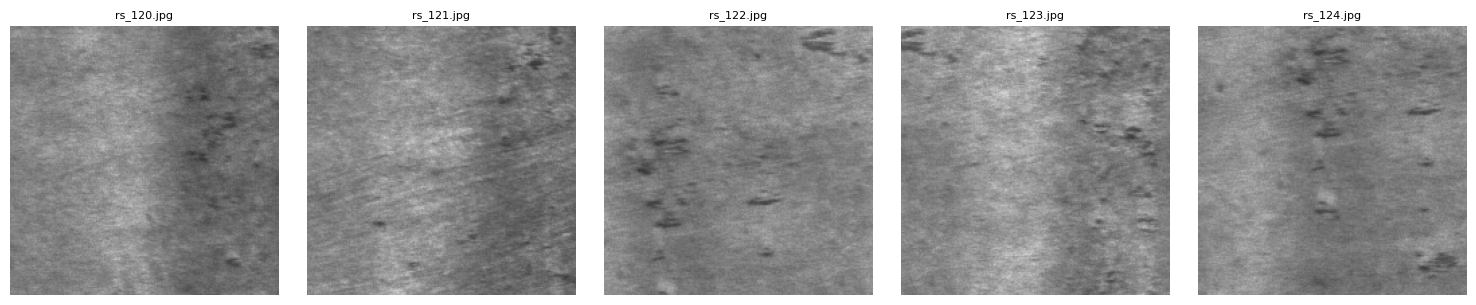


images/metaldefect/train/Scratches - showing first 5 image(s)


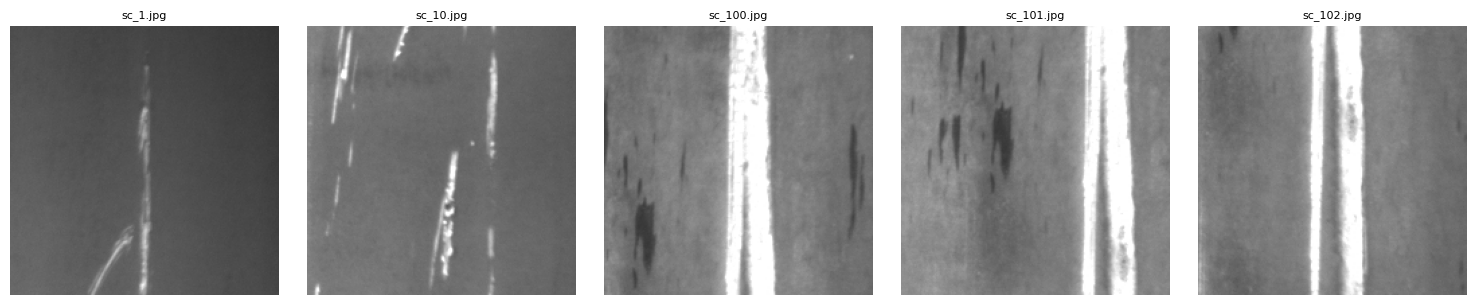

In [20]:
directory = Path(TRAIN_DIR)

for subdir, _, files in os.walk(directory):
    subdir_path = Path(subdir)
    image_files = [
        subdir_path / f for f in files if Path(f).suffix.lower() in image_extensions
    ]
    if image_files:
        print(
            f"\n{subdir} - showing first {min(5, len(image_files))} image(s)")

        fig, axes = plt.subplots(1, min(5, len(image_files)), figsize=(15, 3))
        if len(image_files) == 1:
            axes = [axes]

        for ax, img_path in zip(axes, image_files[:5]):
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(img_path.name, fontsize=8)
            ax.axis("off")

        plt.tight_layout()
        plt.show()

## Images EDA

In [21]:
def get_image_info(directory):
    """
    Create a DataFrame with file size, resolution, and extension for all images in a directory.
    
    Args:
        directory: Path to the directory containing image files
    
    Returns:
        pandas DataFrame with columns: filename, extension, file_size_bytes, file_size_mb, width, height, resolution
    """
    image_data = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Get file extension
            _, extension = os.path.splitext(filename.lower())

            # Check if file has an image extension
            if extension in image_extensions:
                filepath = os.path.join(root, filename)

                try:
                    # Get file size
                    file_size = os.path.getsize(filepath)

                    # Get image resolution
                    with Image.open(filepath) as img:
                        width, height = img.size

                    category = filepath.split("/")[3]
                    dataset = filepath.split("/")[2]

                    image_data.append({
                        'filename': filename,
                        'extension': extension.lstrip(".").upper(),
                        'filepath': filepath,
                        'category': category.upper(),
                        'dataset': dataset.upper(),
                        'file_size_bytes': file_size,
                        'width': width,
                        'height': height,
                        'resolution': f"{width}x{height}"
                    })
                except Exception as e:
                    print(f"❌ Error processing {filename}: {e}")

    # Create DataFrame
    df = pd.DataFrame(image_data)

    return df

In [22]:
df = get_image_info(IMAGES_DIR)

df = df.sort_values(by='filepath', ascending=False)
df

,filename,extension,filepath,category,dataset,file_size_bytes,width,height,resolution
1379,sc_99.jpg,JPG,images/metaldefect/train/Scratches/sc_99.jpg,SCRATCHES,TRAIN,21438,200,200,200x200
1378,sc_98.jpg,JPG,images/metaldefect/train/Scratches/sc_98.jpg,SCRATCHES,TRAIN,22026,200,200,200x200
1377,sc_97.jpg,JPG,images/metaldefect/train/Scratches/sc_97.jpg,SCRATCHES,TRAIN,21707,200,200,200x200
1376,sc_96.jpg,JPG,images/metaldefect/train/Scratches/sc_96.jpg,SCRATCHES,TRAIN,21166,200,200,200x200
1375,sc_95.jpg,JPG,images/metaldefect/train/Scratches/sc_95.jpg,SCRATCHES,TRAIN,20725,200,200,200x200
...,...,...,...,...,...,...,...,...,...
4,cr_250.jpg,JPG,images/metaldefect/test/Crazing/cr_250.jpg,CRAZING,TEST,38918,200,200,200x200
3,cr_249.jpg,JPG,images/metaldefect/test/Crazing/cr_249.jpg,CRAZING,TEST,39450,200,200,200x200
2,cr_248.jpg,JPG,images/metaldefect/test/Crazing/cr_248.jpg,CRAZING,TEST,33779,200,200,200x200
1,cr_247.jpg,JPG,images/metaldefect/test/Crazing/cr_247.jpg,CRAZING,TEST,39545,200,200,200x200


In [23]:
df.dtypes

filename           object
extension          object
filepath           object
category           object
dataset            object
file_size_bytes     int64
width               int64
height              int64
resolution         object
dtype: object

In [24]:
df.describe()

,file_size_bytes,width,height
count,1380.000000,1380.0,1380.0
mean,27597.700000,200.0,200.0
std,6875.579441,0.0,0.0
min,16002.000000,200.0,200.0
25%,20962.250000,200.0,200.0
50%,28235.000000,200.0,200.0
75%,33748.000000,200.0,200.0
max,40095.000000,200.0,200.0


<Axes: >

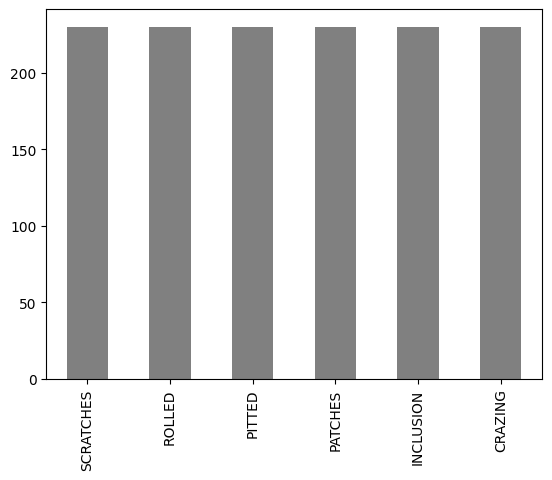

In [25]:
df['category'].value_counts(sort=True).plot.bar(color='grey')

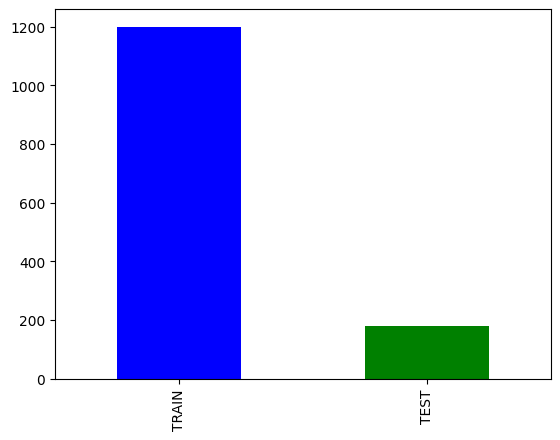

In [26]:
category_counts = df['dataset'].value_counts(sort=True)
colors = ['blue', 'green']
category_counts.plot.bar(color=colors)

plt.show()

In [27]:
CSV_FILE = os.path.join(RESULTS_DIR, "images_details.csv")

df.to_csv(CSV_FILE, index=False)

In [28]:
!ls $CSV_FILE -lh

-rwxrwxrwx 1 root root 128K Oct 14 13:48 results/images_details.csv


In [29]:
link = FileLink(path=CSV_FILE)
link

/mnt/batch/tasks/shared/LS_root/mounts/clusters/standardd48/code/Users/seretkow/AutoML Image Classification 2025/results/images_details.csv